<a href="https://colab.research.google.com/github/Shoutaa/Pengolahan-Citra-Chapter-8/blob/main/2206046_A_Pengolahan_Citra_Chapter_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Soal 1: Jenis-Jenis Tepi**

## **Pertanyaan**:

1. Jelaskan empat jenis tepi yang biasa ditemukan dalam citra digital.
2. Berikan contoh masing-masing jenis tepi dalam kehidupan sehari-hari.
3. Mengapa tepi dengan derau memerlukan pendekatan khusus untuk pendeteksiannya?

Tujuan: Memahami jenis tepi dan tantangan pendeteksian pada citra yang mengandung derau.

## **Jawaban**

### **Empat Jenis Tepi dan contoh**

1. **Tepi Langkah (Step Edge):**  
   - **Deskripsi:** Tepi yang terjadi ketika intensitas berubah secara tiba-tiba dari satu tingkat ke tingkat lainnya. Biasanya ditemukan pada batas objek dengan pencahayaan seragam.
   - **Contoh:** Perbatasan antara dinding putih dan kusen pintu hitam di rumah. Intensitas cahaya berubah drastis di area tersebut, dari terang (dinding putih) menjadi gelap (kusen hitam).   

2. **Tepi Atap (Roof Edge):**  
   - **Deskripsi:** Tepi yang terjadi ketika intensitas berubah secara bertahap, membentuk puncak (roof) dan kembali ke nilai sebelumnya. Biasanya ditemukan pada permukaan yang menyala dengan pencahayaan gradual.
   - **Contoh:** Cahaya yang memantul di permukaan mobil mengkilap saat terkena sinar matahari. Intensitas cahaya perlahan meningkat hingga puncak (membentuk "atap") dan kemudian menurun secara bertahap.  

3. **Tepi Garis (Line Edge):**  
   - **Deskripsi:** Tepi yang terbentuk oleh transisi intensitas dalam satu garis yang lebih gelap atau lebih terang dibandingkan area sekitarnya.
   Contoh: Kabel listrik hitam yang terlihat kontras terhadap langit biru cerah. Kabel muncul sebagai garis tipis gelap di antara area terang.
   - **Contoh:** Kabel listrik hitam yang terlihat kontras terhadap langit biru cerah. Kabel muncul sebagai garis tipis gelap di antara area terang.

4. **Tepi Sudut (Corner Edge):**  
   - **Deskripsi:** Tepi yang terjadi di mana dua atau lebih tepi bertemu, biasanya pada objek dengan bentuk geometris tajam.  
   - **Contoh:** Sudut meja kayu atau tepi pada bingkai jendela. Sudut ini adalah tempat dua permukaan bertemu, misalnya sisi vertikal dan horizontal meja.
   Contoh: Sudut meja kayu atau tepi pada bingkai jendela. Sudut ini adalah tempat dua permukaan bertemu, misalnya sisi vertikal dan horizontal meja.

### **Mengapa tepi dengan derau memerlukan pendekatan khusus untuk pendeteksiannya?**

Tepi dengan derau membutuhkan pendekatan khusus karena derau dapat mengaburkan tepi asli, menciptakan tepi palsu, atau membuat tepi terputus-putus. Hal ini terjadi karena derau menambahkan fluktuasi acak pada intensitas piksel, sehingga tepi sulit dibedakan dari gangguan. Untuk mengatasinya, digunakan metode seperti filter Gaussian untuk menghaluskan citra, algoritma tangguh seperti Canny Edge Detection untuk menyaring tepi palsu, dan thresholding adaptif untuk membedakan tepi nyata dari pola derau. Pendekatan ini memastikan pendeteksian lebih akurat dan andal.

---

# **Soal 2: Pendeteksian Tepi Menggunakan Operator Gradien**

## **Pertanyaan**:

1. Operator Sobel dan Prewitt digunakan untuk pendeteksian tepi. Pilih salah satu operator tersebut.
2. Implementasikan kode Python menggunakan pustaka seperti NumPy atau OpenCV untuk mendeteksi tepi dalam sebuah citra.
3. Jelaskan langkah-langkah implementasi secara rinci.

Tujuan: Mengasah keterampilan praktis dalam penerapan algoritma pendeteksian tepi.

## **Jawaban**

### **Operator Sobel**

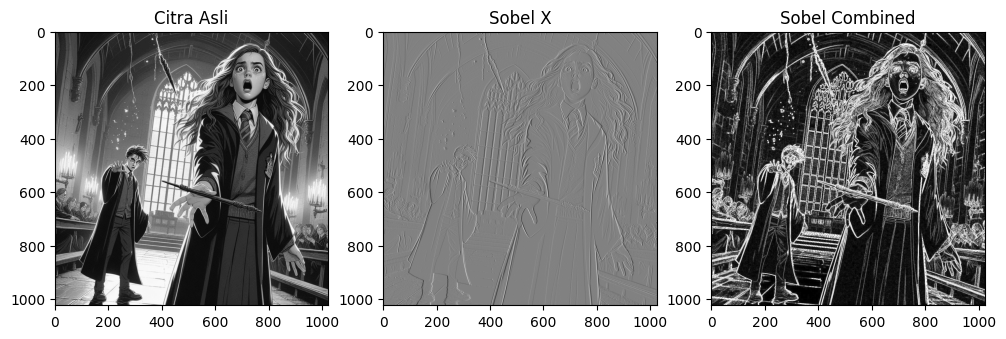

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Membaca citra dalam mode grayscale
image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# 2. Mengaplikasikan Sobel untuk gradien horizontal (dx) dan vertikal (dy)
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Gradien horizontal
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Gradien vertikal

# 3. Menggabungkan gradien horizontal dan vertikal
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

# 4. Normalisasi hasil agar intensitas terlihat jelas
sobel_combined = cv2.convertScaleAbs(sobel_combined)

# 5. Menampilkan hasil
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1), plt.title('Citra Asli'), plt.imshow(image, cmap='gray')
plt.subplot(1, 3, 2), plt.title('Sobel X'), plt.imshow(sobel_x, cmap='gray')
plt.subplot(1, 3, 3), plt.title('Sobel Combined'), plt.imshow(sobel_combined, cmap='gray')
plt.show()


### **Langkah-Langkah Implementasi**

1. **Membaca Citra dalam Mode Grayscale**
   ```python
   image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)
   ```
   - Menggunakan fungsi `cv2.imread` untuk membaca citra.
   - Parameter `cv2.IMREAD_GRAYSCALE` memastikan citra diubah menjadi grayscale, sehingga analisis hanya dilakukan pada intensitas piksel tanpa mempertimbangkan saluran warna.

2. **Mengaplikasikan Sobel untuk Gradien Horizontal (X) dan Vertikal (Y)**
   ```python
   sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Gradien horizontal
   sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Gradien vertikal
   ```
   - `cv2.Sobel` digunakan untuk menghitung gradien intensitas dengan kernel Sobel.
   - Parameter:
     - `cv2.CV_64F`: Tipe data hasil gradien untuk menghindari overflow.
     - `1, 0`: Gradien dihitung pada sumbu horizontal (X).
     - `0, 1`: Gradien dihitung pada sumbu vertikal (Y).
     - `ksize=3`: Ukuran kernel Sobel, yaitu \(3 \times 3\).

3. **Menggabungkan Gradien Horizontal dan Vertikal**
   ```python
   sobel_combined = cv2.magnitude(sobel_x, sobel_y)
   ```
   - `cv2.magnitude` menghitung magnitudo gradien dengan rumus:
     \[
     G = \sqrt{G_x^2 + G_y^2}
     \]
   - Menggabungkan informasi dari gradien horizontal (`sobel_x`) dan vertikal (`sobel_y`).

4. **Normalisasi Hasil agar Intensitas Terlihat Jelas**
   ```python
   sobel_combined = cv2.convertScaleAbs(sobel_combined)
   ```
   - `cv2.convertScaleAbs` digunakan untuk mengonversi hasil gradien ke tipe data uint8.
   - Proses ini memastikan hasil dapat divisualisasikan dengan intensitas piksel yang sesuai.

5. **Menampilkan Hasil**
   ```python
   plt.figure(figsize=(12, 6))
   plt.subplot(1, 3, 1), plt.title('Citra Asli'), plt.imshow(image, cmap='gray')
   plt.subplot(1, 3, 2), plt.title('Sobel X'), plt.imshow(sobel_x, cmap='gray')
   plt.subplot(1, 3, 3), plt.title('Sobel Combined'), plt.imshow(sobel_combined, cmap='gray')
   plt.show()
   ```
   - `Matplotlib` digunakan untuk menampilkan citra dalam 3 subplot:
     1. **Citra Asli:** Untuk referensi.
     2. **Sobel X:** Gradien horizontal yang menyoroti perubahan intensitas dalam arah horizontal.
     3. **Sobel Combined:** Hasil penggabungan gradien horizontal dan vertikal, yang menunjukkan tepi secara keseluruhan.
   - `cmap='gray'` memastikan citra ditampilkan dalam skala abu-abu.


---


# **Soal 3: Perbandingan Operator Pendeteksi Tepi**

## **Pertanyaan**:

1. Berikan perbandingan antara operator Sobel, Prewitt, dan Canny berdasarkan:
 *   Akurasi pendeteksian
 *   Kompleksitas komputasi
2. Dalam situasi apa operator Canny lebih direkomendasikan dibanding operator lainnya?

Tujuan: Mengevaluasi kelebihan dan kekurangan berbagai metode pendeteksian tepi.

## **Jawaban**

### **perbandingan antara operator Sobel, Prewitt, dan Canny**

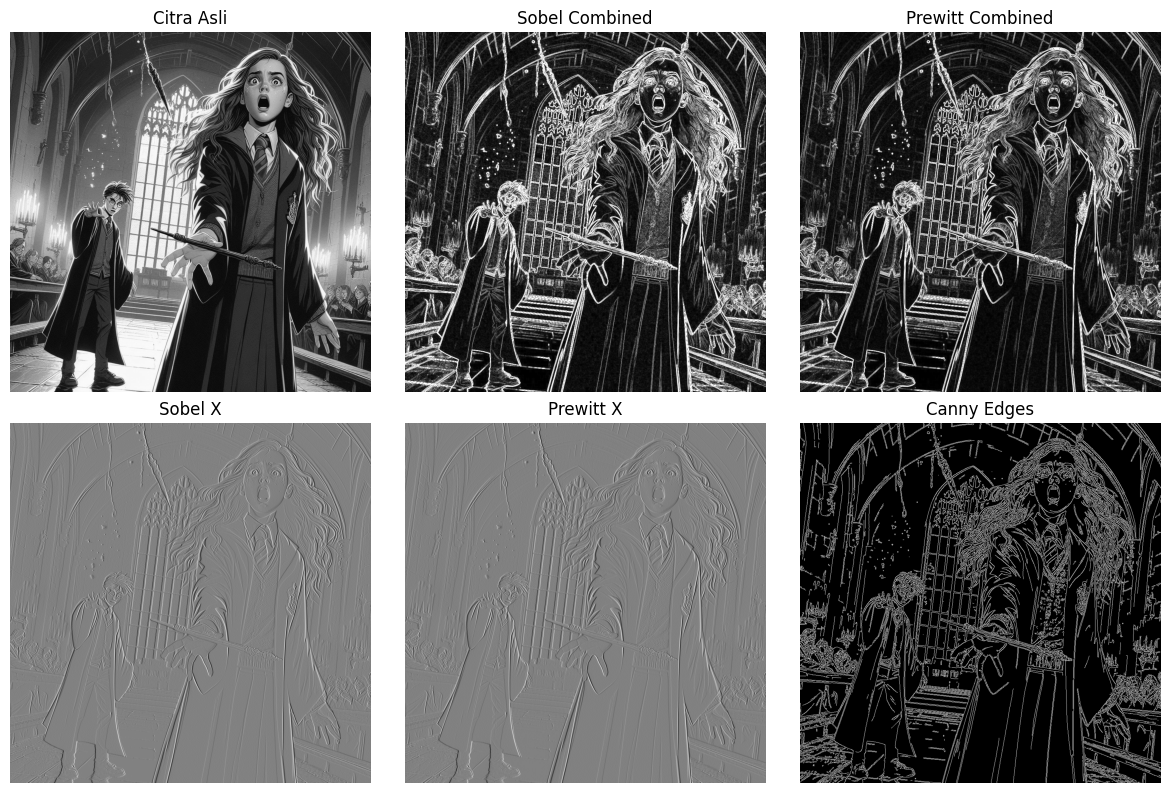

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Membaca Citra dalam Grayscale
image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# 2. Pendeteksian Tepi dengan Sobel
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Gradien horizontal
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Gradien vertikal
sobel_combined = cv2.magnitude(sobel_x, sobel_y)
sobel_combined = cv2.convertScaleAbs(sobel_combined)

# 3. Pendeteksian Tepi dengan Prewitt
# Menggunakan filter manual
kernel_prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
kernel_prewitt_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
prewitt_x = cv2.filter2D(image, cv2.CV_64F, kernel_prewitt_x)  # Konversi ke float64
prewitt_y = cv2.filter2D(image, cv2.CV_64F, kernel_prewitt_y)  # Konversi ke float64
prewitt_combined = cv2.magnitude(prewitt_x, prewitt_y)
prewitt_combined = cv2.convertScaleAbs(prewitt_combined)

# 4. Pendeteksian Tepi dengan Canny
canny_edges = cv2.Canny(image, 100, 200)

# 5. Menampilkan Hasil
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.title('Citra Asli')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title('Sobel Combined')
plt.imshow(sobel_combined, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title('Prewitt Combined')
plt.imshow(prewitt_combined, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title('Sobel X')
plt.imshow(sobel_x, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title('Prewitt X')
plt.imshow(prewitt_x, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.title('Canny Edges')
plt.imshow(canny_edges, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()



 **1. Akurasi Pendeteksian**

| **Operator** | **Akurasi Pendeteksian**                                                                                       |
|--------------|---------------------------------------------------------------------------------------------------------------|
| **Sobel**    | Akurasi cukup baik, terutama pada perubahan intensitas tajam. Cocok untuk tugas umum tetapi kurang sensitif terhadap noise. |
| **Prewitt**  | Akurasi sedikit di bawah Sobel karena tidak memiliki smoothing bawaan. Lebih rentan terhadap noise.            |
| **Canny**    | Akurasi tinggi. Menggunakan teknik multi-tahap seperti Gaussian blur untuk noise reduction dan non-maximum suppression untuk tepi tajam. |


**2. Kompleksitas Komputasi**

| **Operator** | **Kompleksitas Komputasi**                                                                                   |
|--------------|-------------------------------------------------------------------------------------------------------------|
| **Sobel**    | Kompleksitas rendah hingga sedang. Menggunakan kernel fixed-size (3x3 atau 5x5), sehingga cepat.             |
| **Prewitt**  | Kompleksitas sangat rendah. Mirip Sobel tetapi lebih sederhana karena tidak memiliki smoothing bawaan.       |
| **Canny**    | Kompleksitas tinggi. Menggunakan multi-tahap (Gaussian blur, gradien, non-maximum suppression, double thresholding). |


### **Operator Canny lebih direkomendasikan dibanding operator lainnya dalam situasi berikut:**

**1. Ketika Noise Reduction Diperlukan**
  - Jika citra memiliki **noise tinggi**, Canny unggul karena menggunakan **Gaussian Blur** sebagai langkah awal untuk mengurangi noise sebelum mendeteksi tepi.
  - Sobel dan Prewitt lebih rentan terhadap noise karena tidak memiliki langkah penghalusan bawaan.

**2. Ketika Akurasi Tepi yang Tinggi Dibutuhkan**
  - Canny menggunakan algoritma multi-tahap yang mencakup:
    - **Non-Maximum Suppression** untuk memastikan hanya tepi tajam yang dipertahankan.
    - **Double Thresholding** untuk membedakan tepi kuat dan lemah.
  - Hal ini menghasilkan deteksi tepi yang lebih presisi dibanding Sobel atau Prewitt.

**3. Ketika Memerlukan Tepi yang Terhubung**
  - Canny mampu memastikan bahwa tepi lemah yang terhubung dengan tepi kuat tetap dipertahankan melalui langkah **Edge Tracking by Hysteresis**.
  - Ini sangat berguna dalam aplikasi seperti segmentasi citra atau pengenalan objek, di mana kelengkapan tepi sangat penting.

**4. Ketika Citra Kompleks dengan Banyak Detail**
  - Canny bekerja sangat baik untuk citra dengan banyak detail atau gradien yang tidak terlalu tajam.
  - Contoh: analisis medis, pengenalan karakter tulisan tangan, atau deteksi fitur wajah.

**5. Ketika Menggunakan Citra untuk Analisis Lanjutan**
  - Dalam pipeline analisis yang lebih kompleks (misalnya, pengolahan citra medis atau deteksi objek otomatis), output dari Canny sering digunakan sebagai masukan karena hasilnya lebih bersih dan terdefinisi dengan baik.

---

# **Soal 4: Pendeteksian Tepi pada Citra Noisy**

## **Pertanyaan**:

1. Sebuah citra memiliki derau "salt-and-pepper". Lakukan langkah berikut:
 * Terapkan Gaussian filter untuk mengurangi derau.
 * Gunakan metode Sobel dan Canny untuk mendeteksi tepi.
2. Bandingkan hasil pendeteksian dari kedua metode dengan citra asli.
3. Berikan analisis hasil yang diperoleh.

Tujuan: Memahami pentingnya praproses data (filtering) sebelum pendeteksian tepi dan menganalisis hasilnya.

## **Jawaban**

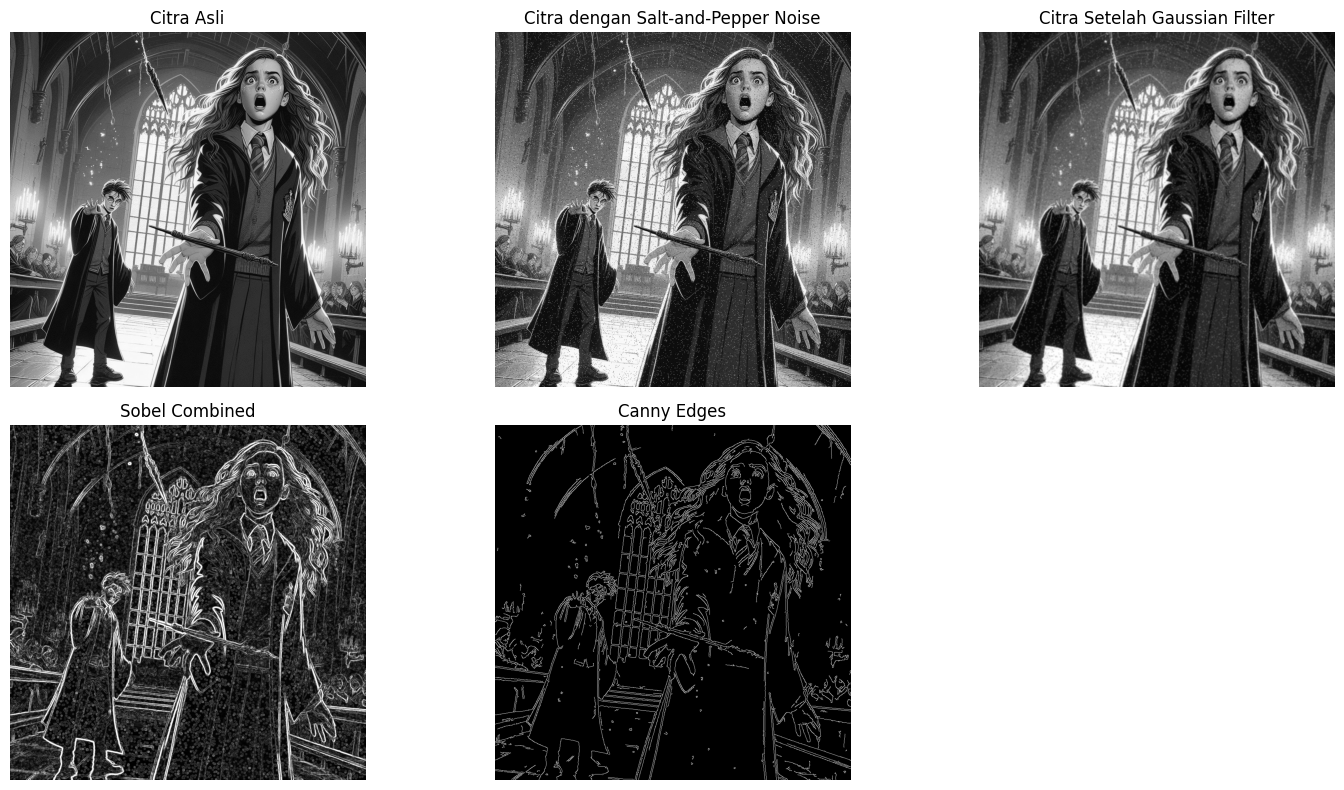

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Membaca Citra
image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# 2. Menambahkan Noise "Salt-and-Pepper" untuk Simulasi (Jika Tidak Ada)
def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = np.copy(image)
    total_pixels = image.size
    # Salt noise
    salt_count = int(salt_prob * total_pixels)
    coords = [np.random.randint(0, i - 1, salt_count) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 255
    # Pepper noise
    pepper_count = int(pepper_prob * total_pixels)
    coords = [np.random.randint(0, i - 1, pepper_count) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 0
    return noisy_image

noisy_image = add_salt_and_pepper_noise(image, salt_prob=0.02, pepper_prob=0.02)

# 3. Mengurangi Noise dengan Gaussian Filter
gaussian_filtered = cv2.GaussianBlur(noisy_image, (5, 5), 1.5)

# 4. Pendeteksian Tepi
# Sobel
sobel_x = cv2.Sobel(gaussian_filtered, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gaussian_filtered, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)
sobel_combined = cv2.convertScaleAbs(sobel_combined)

# Canny
canny_edges = cv2.Canny(gaussian_filtered, 100, 200)

# 5. Visualisasi
plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
plt.title('Citra Asli')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title('Citra dengan Salt-and-Pepper Noise')
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title('Citra Setelah Gaussian Filter')
plt.imshow(gaussian_filtered, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title('Sobel Combined')
plt.imshow(sobel_combined, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title('Canny Edges')
plt.imshow(canny_edges, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


### **Hasil Pendeteksian dan Analisis**
1. **Citra Asli**
   - Citra asli berisi detail objek dan tekstur. Pada citra ini, tepi yang signifikan sering terlihat pada perbedaan intensitas cahaya atau warna.
   - Citra asli sering kali memiliki noise "salt-and-pepper", yang dapat mengganggu proses pendeteksian tepi.

2. **Sobel**
   - **Hasil**: Sobel mendeteksi tepi utama dengan baik, terutama pada perubahan intensitas yang tajam (misalnya, tepi objek besar atau batas terang-gelap). Namun:
     - Noise sisa dari proses Gaussian filtering terkadang masih terdeteksi sebagai tepi.
     - Tepi yang dihasilkan lebih tebal dan kurang detail dibandingkan Canny.
   - **Kelebihan**:
     - Sederhana dan cepat dalam implementasi.
     - Cocok untuk aplikasi dasar seperti estimasi gradien intensitas.
   - **Kekurangan**:
     - Tidak dapat membedakan antara noise dan tepi yang signifikan.
     - Tidak menangkap detail halus pada objek.

3. **Canny**
   - **Hasil**: Canny menghasilkan tepi yang jauh lebih bersih dan presisi. Dengan langkah seperti Gaussian blur, non-maximum suppression, dan thresholding, hasilnya:
     - Tepi yang tajam dan halus dengan noise minimal.
     - Detail halus pada citra tetap terdeteksi dengan baik.
   - **Kelebihan**:
     - Sangat akurat dalam mendeteksi tepi utama.
     - Noise dapat dikurangi secara signifikan.
     - Cocok untuk citra dengan banyak detail atau analisis lebih lanjut.
   - **Kekurangan**:
     - Memiliki kompleksitas komputasi lebih tinggi, membutuhkan waktu pemrosesan lebih lama.

### **Perbandingan Visual**
| **Aspek**        | **Sobel**                          | **Canny**                          | **Citra Asli**                     |
|-------------------|------------------------------------|-------------------------------------|-------------------------------------|
| **Noise**         | Masih terlihat beberapa noise.    | Hampir seluruh noise dihilangkan.  | Mengandung noise "salt-and-pepper".|
| **Tepi Halus**    | Kurang baik, tepi cenderung kasar.| Sangat baik, tepi lebih tajam.     | Tidak terdefinisi sebagai tepi.    |
| **Detail Kecil**  | Tidak semua terdeteksi.           | Sebagian besar terdeteksi.         | Masih terlihat sebagai bagian tekstur.|
| **Presisi**       | Rendah, hasil tepi lebih tebal.   | Tinggi, hasil lebih halus dan detail.| Tidak berlaku.                     |    

# **Instruksi Penyelesaian**

Instruksi Penyelesaian
1. Jawab Pertanyaan-pertanyaan tersebut di colab, menggunakan text atau markdown di github
2. Gunakan platform kolaboratif seperti Google Colab untuk implementasi dan demonstrasi praktis.
3. Kumpulkan link github pengerjaan di LMS

Catatan: Untuk soal implementasi, disarankan menggunakan pustaka Python seperti OpenCV, NumPy, dan Matplotlib untuk pemrosesan citra.